<a href="https://colab.research.google.com/github/mmiqdam/GISportfolio/blob/main/OSMnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Geospatial Analysis :Automation with OSMnx in Colab**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Determine the desired storage location
loc = '/content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi'

# Change to the previously defined storage
os.chdir(loc)

# Check if the storage location is as defined
print('Working Directory: ',os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working Directory:  /content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi


In [ ]:
# Call necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

!pip install contextily
import contextily as cx

!apt install libspatialindex-dev # aims to install the libspatialindex library along with the files needed for software development that uses the library.
!pip install osmnx

import osmnx as ox

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libspatialindex-dev is already the newest version (1.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Define the area for downloading street data (e.g., Jakarta)
place_name = "Tanah Abang, Central Jakarta, Special capital Region of Jakarta, Java, Indonesia"

# Bounding box for Tanah Abang area, Jakarta
north, south, east, west = -6.1815422, -6.2315256, 106.8255176, 106.7917978

# Define the area using a central point and radius
latitude, longitude = -6.2052581,106.80949961953083  # Center point in Tanah Abang
dist = 2000  # Radius in meters (2 km)

**RETRIEVING DATA WITH OSMNX**

RETRIEVING POLYGON DATA

In [ ]:
# Retrieve commercial building and supermarket data in Tanah Abang District
buildings = ox.features_from_place(place_name, tags={'building': ['commercial', 'supermarket']})

# Display some important columns from the building data
buildings[['name', 'building', 'geometry']].head()

name    building  \
element id                                               
node    4240838189               Kompas TV  commercial   
way     119772916        Panin Bank Center  commercial   
        119773303               Wisma GKBI  commercial   
        120827509   UOB Plaza Thamrin Nine  commercial   
        120827524      Wisma Nugra Santana  commercial   

                                                             geometry  
element id                                                             
node    4240838189                         POINT (106.79403 -6.20901)  
way     119772916   POLYGON ((106.79915 -6.22797, 106.79912 -6.228...  
        119773303   POLYGON ((106.81323 -6.21741, 106.81311 -6.217...  
        120827509   POLYGON ((106.82199 -6.19889, 106.8227 -6.1988...  
        120827524   POLYGON ((106.82131 -6.20799, 106.82145 -6.208...

In [ ]:
# Retrieve building data in Tanah Abang District
buildings = ox.features_from_place(place_name, tags={'building': True})

# Display some important columns from the building data
buildings[['name', 'building', 'geometry']].head()

name building  \
element id                                                        
node    315706165                       Menara Thamrin      yes   
        1334326956                            Jaya Pub      yes   
        4146207511                           ANZ Tower      yes   
        4146347313  Kompleks Gedung Manggala Wanabakti      yes   
        4150352889                        Teras Benhil      yes   

                                      geometry  
element id                                      
node    315706165   POINT (106.82207 -6.18559)  
        1334326956  POINT (106.82238 -6.18663)  
        4146207511  POINT (106.81776 -6.21372)  
        4146347313  POINT (106.79804 -6.20712)  
        4150352889  POINT (106.81511 -6.21394)

In [ ]:
# To know the number of data
buildings.shape

(16407, 173)

<Axes: >

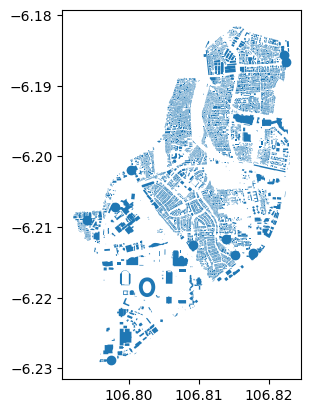

In [ ]:
# To display the data
buildings.plot()

RETRIEVING LINE DATA

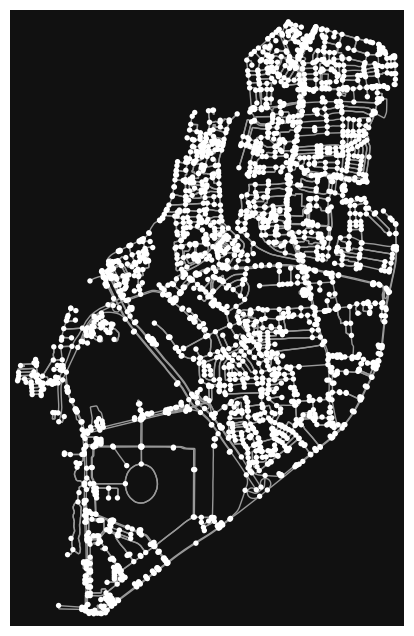

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Specifically for roads (graph), there are two outputs simultaneously, namely edges data in the form of roads and nodes in the form of nodes (junction points)


# Retrieve road network data (lines)
graph = ox.graph_from_place(place_name, network_type='bike')

# Visualize the road network
ox.plot_graph(graph)

'Nodes:'

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
95026316,-6.219047,106.812739,3,NaN,NaN,POINT (106.81274 -6.21905)
103292449,-6.202748,106.821755,4,NaN,NaN,POINT (106.82176 -6.20275)
103352549,-6.228886,106.799467,3,NaN,NaN,POINT (106.79947 -6.22889)
103353816,-6.199685,106.823076,3,NaN,NaN,POINT (106.82308 -6.19969)
103363743,-6.211855,106.806452,3,NaN,NaN,POINT (106.80645 -6.21186)


<Axes: >

'Edges:'

osmid  \
u         v           key                                                      
95026316  388240366   0                                             28138314   
          11088811858 0    [751672034, 453253805, 1252846325, 449551349, ...   
103292449 1783134147  0                                            524574454   
          5377255733  0                             [1282090547, 1001575212]   
103352549 7768361973  0                               [652143808, 449551321]   

                              highway   lanes  oneway reversed      length  \
u         v           key                                                    
95026316  388240366   0    trunk_link       2    True    False  242.207693   
          11088811858 0       primary  [4, 2]    True    False  362.972723   
103292449 1783134147  0       primary       2    True    False   60.658674   
          5377255733  0      tertiary     NaN    True    False  169.159514   
103352549 7768361973  0       primary       2    True    False   59.336838   

                                                                    geometry  \
u         v           key                                                      
95026316  388240366   0    LINESTRING (106.81274 -6.21905, 106.81288 -6.2...   
          11088811858 0    LINESTRING (106.81274 -6.21905, 106.81298 -6.2...   
103292449 1783134147  0    LINESTRING (106.82176 -6.20275, 106.82186 -6.2...   
          5377255733  0    LINESTRING (106.82176 -6.20275, 106.82193 -6.2...   
103352549 7768361973  0    LINESTRING (106.79947 -6.22889, 106.79953 -6.2...   

                                                         name  \
u         v           key                                       
95026316  388240366   0                                   NaN   
          11088811858 0               Jalan Jenderal Sudirman   
103292449 1783134147  0    Jalan RM Margono Djojohadikoesoemo   
          5377255733  0                                   NaN   
103352549 7768361973  0                Jalan Sisingamangaraja   

                                      width est_width access maxspeed  ref  \
u         v           key                                                    
95026316  388240366   0                 NaN       NaN    NaN      NaN  NaN   
          11088811858 0    [9.7, 11.1, 8.3]      6.64    yes       25  NaN   
103292449 1783134147  0                 NaN      5.33    yes      NaN  NaN   
          5377255733  0                 NaN       NaN    NaN      NaN  NaN   
103352549 7768361973  0           [9, 10.8]       NaN    NaN      NaN  NaN   

                          tunnel bridge service junction  
u         v           key                                 
95026316  388240366   0      NaN    NaN     NaN      NaN  
          11088811858 0      NaN    NaN     NaN      NaN  
103292449 1783134147  0      NaN    NaN     NaN      NaN  
          5377255733  0      NaN    NaN     NaN      NaN  
103352549 7768361973  0      NaN    NaN     NaN      NaN

<Axes: >

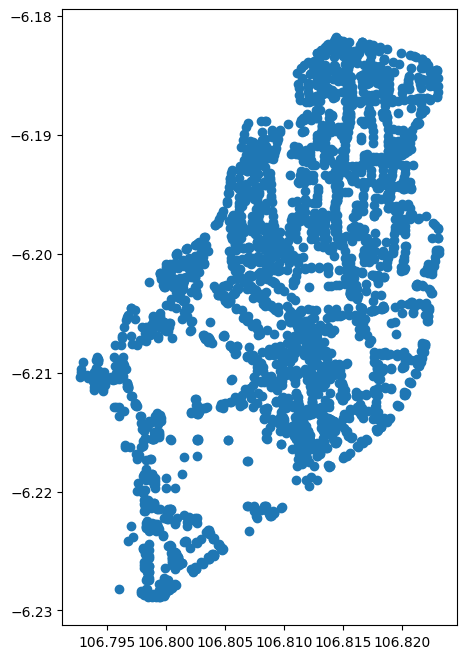

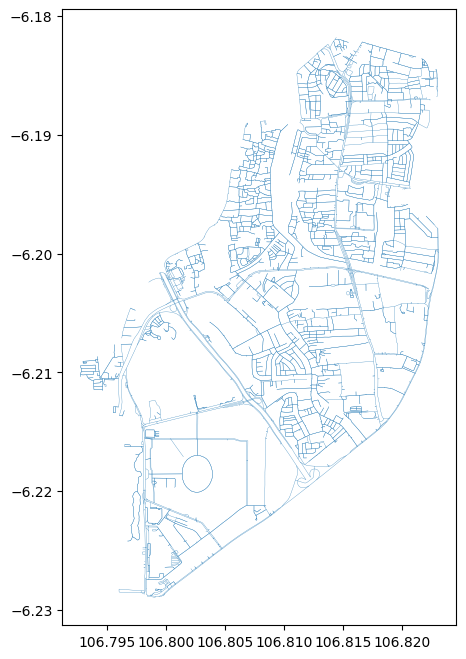

In [ ]:
# Convert to GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph)

display(
'Nodes:', nodes.head(), nodes.plot(figsize=(8,8)),
'Edges:', edges.head(), edges.plot(figsize=(8,8), linewidth=0.2)
)

<Axes: >

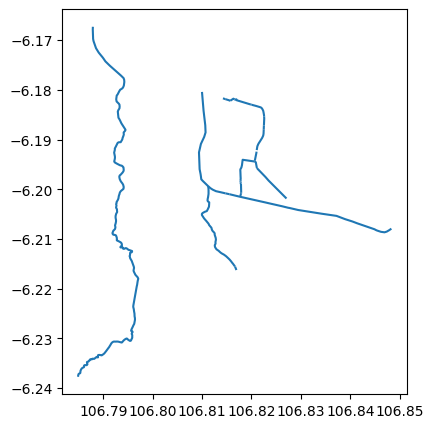

In [ ]:
# Retrieve river data
rivers = ox.features_from_place(place_name, tags={'waterway': 'river'})

# Display river data
rivers[['name', 'waterway', 'geometry']].head()

rivers.plot(figsize=(5,5))

RETRIEVING POINT DATA

In [ ]:
# Retrieve public facility data (points) in Jakarta
amenities = ox.features_from_place(place_name, tags={'amenity': ['school', 'hospital', 'cafe', 'bus_station']})

# Display public facility data
amenities[['name', 'amenity', 'geometry']].head()

name amenity                    geometry
element id                                                             
node    2185108537        Starbucks    cafe  POINT (106.82186 -6.18553)
        3742372148        Starbucks    cafe  POINT (106.82081 -6.20186)
        3742385311        Starbucks    cafe  POINT (106.82035 -6.19502)
        4001897804  Tanamera Coffee    cafe  POINT (106.81681 -6.19557)
        4148233752    Cosmo Terrace    cafe  POINT (106.81619 -6.19426)

<Axes: >

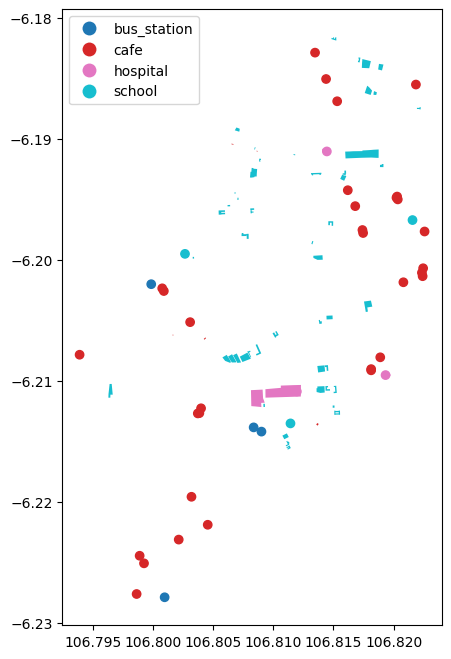

In [ ]:
amenities.plot(figsize=(8,8), column='amenity', legend=True)

SEPARATING GEOMETRY TYPES

In [ ]:
# Check the geometry types in the amenities variable
amenities.geom_type.unique()

array(['Point', 'Polygon'], dtype=object)

In [ ]:
# Separating Polygons
amenities_ar = amenities[amenities.geom_type == 'Polygon']

In [ ]:
# Separating Points
amenities_pt = amenities[amenities.geom_type == 'Point']

'Polygons:'

geometry  \
element  id                                                             
relation 7319322    POLYGON ((106.81544 -6.21246, 106.81555 -6.212...   
way      122152269  POLYGON ((106.81931 -6.20935, 106.81957 -6.209...   
         155102297  POLYGON ((106.81314 -6.19285, 106.814 -6.19282...   
         155102299  POLYGON ((106.81326 -6.19872, 106.81317 -6.198...   
         155102301  POLYGON ((106.81458 -6.19682, 106.81457 -6.197...   

                     amenity brand brand:wikidata brand:wikipedia cuisine  \
element  id                                                                 
relation 7319322      school   NaN            NaN             NaN     NaN   
way      122152269  hospital   NaN            NaN             NaN     NaN   
         155102297    school   NaN            NaN             NaN     NaN   
         155102299    school   NaN            NaN             NaN     NaN   
         155102301    school   NaN            NaN             NaN     NaN   

                   internet_access  \
element  id                          
relation 7319322               NaN   
way      122152269             NaN   
         155102297             NaN   
         155102299             NaN   
         155102301             NaN   

                                                                 name  \
element  id                                                             
relation 7319322                                      Sekolah Paket 1   
way      122152269                    RS Murni Teguh Sudirman Jakarta   
         155102297         SD Negeri Kebon Melati 01, 02, dan 03 Pagi   
         155102299                                           SMP 1945   
         155102301  Yayasan Muhammadiyah Tanah Abang I (MDM, SDM56...   

                   official_name takeaway  ... shelter_tj toilets:access  \
element  id                                ...                             
relation 7319322             NaN      NaN  ...        NaN            NaN   
way      122152269           NaN      NaN  ...        NaN            NaN   
         155102297           NaN      NaN  ...        NaN            NaN   
         155102299           NaN      NaN  ...        NaN            NaN   
         155102301           NaN      NaN  ...        NaN            NaN   

                   wheelchair changing_table changing_table:fee highchair  \
element  id                                                                 
relation 7319322          NaN            NaN                NaN       NaN   
way      122152269        NaN            NaN                NaN       NaN   
         155102297        NaN            NaN                NaN       NaN   
         155102299        NaN            NaN                NaN       NaN   
         155102301        NaN            NaN                NaN       NaN   

                   internet_access:ssid kids_area toilets toilets:wheelchair  
element  id                                                                   
relation 7319322                    NaN       NaN     NaN                NaN  
way      122152269                  NaN       NaN     NaN                NaN  
         155102297                  NaN       NaN     NaN                NaN  
         155102299                  NaN       NaN     NaN                NaN  
         155102301                  NaN       NaN     NaN                NaN  

[5 rows x 97 columns]

<Axes: >

'Points:'

geometry amenity      brand  \
element id                                                          
node    2185108537  POINT (106.82186 -6.18553)    cafe  Starbucks   
        3742372148  POINT (106.82081 -6.20186)    cafe  Starbucks   
        3742385311  POINT (106.82035 -6.19502)    cafe  Starbucks   
        4001897804  POINT (106.81681 -6.19557)    cafe        NaN   
        4148233752  POINT (106.81619 -6.19426)    cafe        NaN   

                   brand:wikidata brand:wikipedia      cuisine  \
element id                                                       
node    2185108537         Q37158    en:Starbucks  coffee_shop   
        3742372148         Q37158    en:Starbucks  coffee_shop   
        3742385311         Q37158    en:Starbucks  coffee_shop   
        4001897804            NaN             NaN          NaN   
        4148233752            NaN             NaN          NaN   

                   internet_access             name     official_name  \
element id                                                              
node    2185108537             yes        Starbucks  Starbucks Coffee   
        3742372148             NaN        Starbucks  Starbucks Coffee   
        3742385311             NaN        Starbucks  Starbucks Coffee   
        4001897804             NaN  Tanamera Coffee               NaN   
        4148233752             NaN    Cosmo Terrace               NaN   

                   takeaway  ... shelter_tj toilets:access wheelchair  \
element id                   ...                                        
node    2185108537      yes  ...        NaN            NaN        NaN   
        3742372148      yes  ...        NaN            NaN        NaN   
        3742385311      yes  ...        NaN            NaN        NaN   
        4001897804      NaN  ...        NaN            NaN        NaN   
        4148233752      NaN  ...        NaN            NaN        NaN   

                   changing_table changing_table:fee highchair  \
element id                                                       
node    2185108537            NaN                NaN       NaN   
        3742372148            NaN                NaN       NaN   
        3742385311            NaN                NaN       NaN   
        4001897804            NaN                NaN       NaN   
        4148233752            NaN                NaN       NaN   

                   internet_access:ssid kids_area toilets toilets:wheelchair  
element id                                                                    
node    2185108537                  NaN       NaN     NaN                NaN  
        3742372148                  NaN       NaN     NaN                NaN  
        3742385311                  NaN       NaN     NaN                NaN  
        4001897804                  NaN       NaN     NaN                NaN  
        4148233752                  NaN       NaN     NaN                NaN  

[5 rows x 97 columns]

<Axes: >

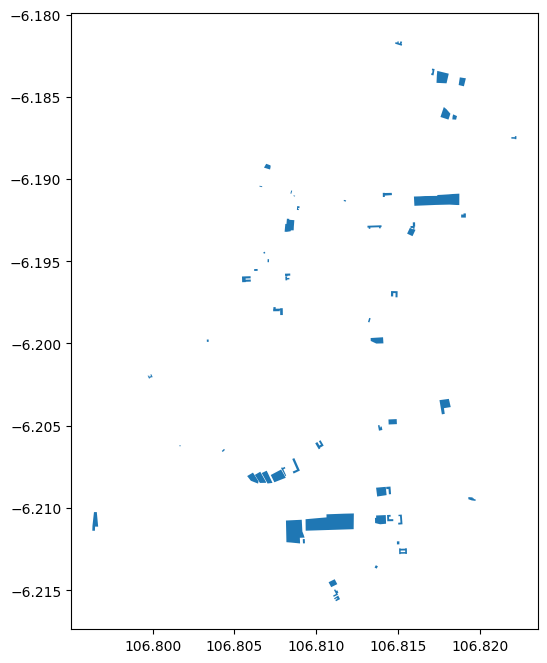

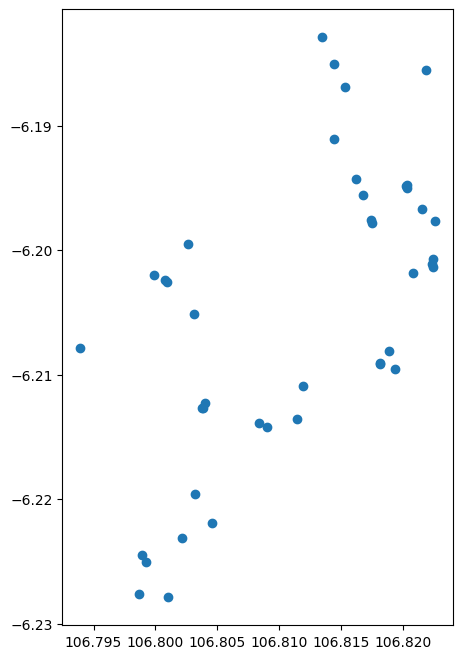

In [ ]:
display(
    'Polygons:', amenities_ar.head(), amenities_ar.plot(figsize=(8,8)),
    'Points:', amenities_pt.head(), amenities_pt.plot(figsize=(8,8))
)

**SHORTEST ROUTE**

Defining the area using place_name.
Downloading road network data.
Using OSMnx to find the coordinates of the desired facilities (e.g., Sarinah and RSUD Tarakan).
Finding the nearest nodes in the road network for both facilities.
Finding and visualizing the shortest route between the two facilities.

DEFINING AREA AND RETRIEVING ROAD NETWORK

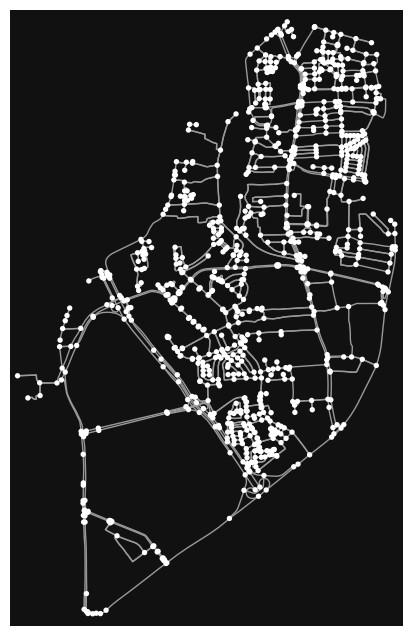

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Download road network in Tanah Abang area
place_name = "Tanah Abang, Central Jakarta, Special Capital Region of Jakarta, Java, Indonesia"
graph = ox.graph_from_place(place_name, network_type='drive')

# Display map of the road network in the area
ox.plot_graph(graph)

RETRIEVE DESIRED PUBLIC FACILITY DATA

In [ ]:
# Download public facility data in Tanah Abang (e.g., mall, hospital)
amenities = ox.features_from_place(place_name, tags={'amenity': True})

# Display some public facility data
amenities[['name', 'amenity', 'geometry']].head()

name      amenity  \
element id                                                   
node    309734894   DanceSignal Spot - Domain    nightclub   
        318176642                         NaN  post_office   
        1334326956                   Jaya Pub          bar   
        1345742942                        KFC    fast_food   
        1354491773          Manggalawanabakti      parking   

                                      geometry  
element id                                      
node    309734894   POINT (106.79726 -6.22733)  
        318176642    POINT (106.8149 -6.18808)  
        1334326956  POINT (106.82238 -6.18663)  
        1345742942  POINT (106.80156 -6.22652)  
        1354491773  POINT (106.79957 -6.20745)

In [ ]:
# Check what amenities (point data) are in the analysis area
amenities_points = amenities[amenities.geom_type=='Point']
amenities_points['amenity'].unique()

array(['nightclub', 'post_office', 'bar', 'fast_food', 'parking',
       'parking_entrance', 'cafe', 'restaurant', 'office',
       'place_of_worship', 'pub', 'police', 'cinema', 'grave_yard',
       'motorcycle_parking', 'kindergarten', 'clinic', 'fuel', 'bank',
       'college', 'university', 'pharmacy', 'school', 'atm', 'shelter',
       'toilets', 'food_court', 'vending_machine', 'taxi', 'dentist',
       'bureau_de_change', 'car_wash', 'charging_station',
       'drinking_water', 'ice_cream', 'theatre', 'library',
       'waste_basket', 'parcel_locker', 'bench', 'bus_station',
       'hospital', 'bicycle_parking'], dtype=object)

In [ ]:
# check hospital and university data
amenities_points[amenities_points['amenity'].isin(['hospital', 'university'])][['amenity', 'name', 'geometry']]

amenity                             name  \
element id                                                         
node    4867479035   university     Sekolah Pasca Sarjana USAHID   
        11878707065    hospital                 RSUD TANAH ABANG   
        11878714650    hospital             RSAL dr. MINTOHARDJO   
        11878744028    hospital  RS MURNI TEGUH SUDIRMAN JAKARTA   

                                       geometry  
element id                                       
node    4867479035   POINT (106.81962 -6.20991)  
        11878707065  POINT (106.81445 -6.19106)  
        11878714650  POINT (106.81196 -6.21088)  
        11878744028  POINT (106.81933 -6.20953)

In [ ]:
# for example, we want to analyze the distance between 'Sekolah Pasca Sarjana USAHID' as a community_centre and 'RSUD TANAH ABANG'

# Extract coordinates of both points from the geometry column
university_coord = (106.81962, -6.20991)
hospital_coord = (106.81445, -6.19106)

FINDING THE NEAREST NODE

Finding the Shortest Route Between Two Facilities Now that we know the nearest nodes
of both facilities, we can use OSMnx to calculate the shortest route
based on the length of the roads between the two nodes.

In [ ]:
# Find the nearest node for both facilities
university_node = ox.distance.nearest_nodes(graph, university_coord[0], university_coord[1])
hospital_node = ox.distance.nearest_nodes(graph, hospital_coord[0], hospital_coord[1])
print(f"Nearest node for Sekolah Pasca Sarjana USAHID: {university_node}")
print(f"Nearest node for RSUD TANAH ABANG: {hospital_node}")

Nearest node for Sekolah Pasca Sarjana USAHID: 318386562
Nearest node for RSUD TANAH ABANG: 317755634


In [ ]:
# Find the shortest route between RSUD Tarakan and Sarinah Mall
route = ox.shortest_path(graph, hospital_node, university_node, weight='length')

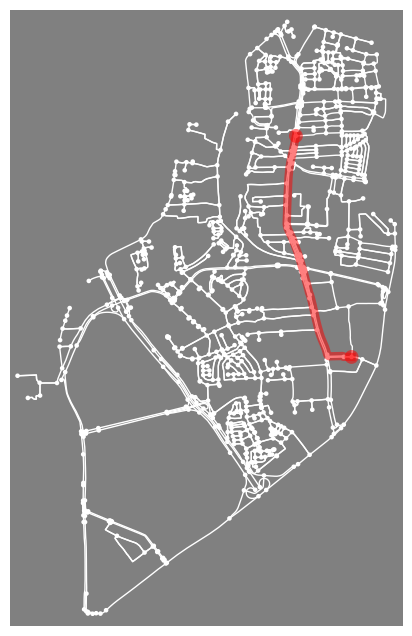

[317755634,
 5948187785,
 9685193030,
 318272903,
 191553193,
 5373872462,
 309906876,
 4901054540,
 6409680650,
 1706050781,
 104350807,
 309941624,
 4499976535,
 309950695,
 5388606573,
 318386562]

In [ ]:
# Display the shortest route
ox.plot_graph_route(graph, route, route_linewidth=6, node_size=11, bgcolor='grey', edge_color='white')

route #--------->  to check Node/Junction ID on the shortest route

<Axes: >

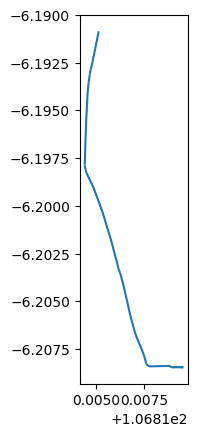

In [ ]:
# Convert the route to a GeoDataFrame
route_gdf = ox.graph_to_gdfs(graph, nodes=False, edges=True, node_geometry=False)
route_edges = route_gdf.loc[[(u, v, key) for u, v, key in graph.edges(keys=True) if u in route and v in route]]
route_gdf = route_edges.copy()
route_gdf = route_gdf.reset_index()

# Select relevant columns
route_gdf = route_gdf[['u', 'v', 'key', 'geometry']]
route_gdf.plot()

Information:

- graph.edges(keys=True): Retrieves all edges from the road network with start node (u),
end node (v), and key (additional parameter for multiple edges).
- u in route and v in route: This is a way to select edges whose nodes are in the
calculated route (filtering only the roads traversed by the route).
- loc[]: This pandas function is used to filter rows in a GeoDataFrame based on the condition we provide.
- reset_index(): Resets the index to avoid issues with the old index which may no longer be relevant after filtering.

**AUTOMATION**

In spatial data analysis, automation is crucial to save time
and simplify repetitive tasks. Python allows us to
create functions to automate various tasks.

Example 1

In [ ]:
def buffer_selection(data, object_data, buffer_distance):
  # Create a buffer from the GeoDataFrame
  buffer_gdf = data.buffer(buffer_distance)

  # Convert the buffer to a new GeoDataFrame
  buffer_gdf = gpd.GeoDataFrame(geometry=buffer_gdf, crs=data.crs)

  # Select objects within the buffer
  objek_dalam_buffer = object_data[object_data.geometry.within(buffer_gdf.union_all())]

  # Calculate the total number of objects in the buffer
  total_objek = len(objek_dalam_buffer)

  return objek_dalam_buffer, total_objek

In [ ]:
# Use Function:

building_river_buff, building_total = buffer_selection(rivers, buildings, 250)

/tmp/ipython-input-55-1541236564.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_gdf = data.buffer(buffer_distance)
